# IPF RANKINGS ANALIZA

In [3]:
import pandas as pd
pd.options.display.max_rows = 20
%matplotlib inline
#nalozimo naslednji paket za dodajanje naslova grafov, legend itd.
import matplotlib.pyplot as plt
#definiramo svojo paleto barv
my_colors = [(x/12.0, x/20.0, 0.75) for x in range(12)]

## UREJANJE PODATKOV
Preberemo csv, združimo podatke v tabeli *moski* in *zenske*.

In [4]:
MM1 = pd.read_csv("uvoz_podatkov/6th_world_classic_MM1.csv", index_col = "ID_tekmovalca")
MM2 = pd.read_csv("uvoz_podatkov/6th_world_classic_MM2.csv", index_col = "ID_tekmovalca")
MM3 = pd.read_csv("uvoz_podatkov/6th_world_classic_MM3.csv", index_col = "ID_tekmovalca")
MM4 = pd.read_csv("uvoz_podatkov/6th_world_classic_MM4.csv", index_col = "ID_tekmovalca")

WM1 = pd.read_csv("uvoz_podatkov/6th_world_classic_WM1.csv", index_col = "ID_tekmovalca")
WM2 = pd.read_csv("uvoz_podatkov/6th_world_classic_WM2.csv", index_col = "ID_tekmovalca")
WM3 = pd.read_csv("uvoz_podatkov/6th_world_classic_WM3.csv", index_col = "ID_tekmovalca")
WM4 = pd.read_csv("uvoz_podatkov/6th_world_classic_WM4.csv", index_col = "ID_tekmovalca")

wMM1 = pd.read_csv("uvoz_podatkov/world_masters_MM1.csv", index_col = "ID_tekmovalca")
wMM2 = pd.read_csv("uvoz_podatkov/world_masters_MM2.csv", index_col = "ID_tekmovalca")
wMM3 = pd.read_csv("uvoz_podatkov/world_masters_MM3.csv", index_col = "ID_tekmovalca")
wMM4 = pd.read_csv("uvoz_podatkov/world_masters_MM4.csv", index_col = "ID_tekmovalca")

wWM1 = pd.read_csv("uvoz_podatkov/world_masters_WM1.csv", index_col = "ID_tekmovalca")
wWM2 = pd.read_csv("uvoz_podatkov/world_masters_WM2.csv", index_col = "ID_tekmovalca")
wWM3 = pd.read_csv("uvoz_podatkov/world_masters_WM3.csv", index_col = "ID_tekmovalca")
wWM4 = pd.read_csv("uvoz_podatkov/world_masters_WM4.csv", index_col = "ID_tekmovalca")

MJ = pd.read_csv("uvoz_podatkov/6th_world_classic_MJ.csv", index_col = "ID_tekmovalca")
WJ = pd.read_csv("uvoz_podatkov/6th_world_classic_WJ.csv", index_col = "ID_tekmovalca")

MSJ = pd.read_csv("uvoz_podatkov/6th_world_classic_MSJ.csv", index_col = "ID_tekmovalca")
WSJ = pd.read_csv("uvoz_podatkov/6th_world_classic_WSJ.csv", index_col = "ID_tekmovalca")


moski = pd.concat([MM1, MM2, MM3, MM4, wMM1, wMM2, wMM3, wMM4, MJ, MSJ])
zenske = pd.concat([WM1, WM2, WM3, WM4, wWM1, wWM2, wWM3, wWM4, WJ, WSJ])

V tabeli *moski* in *zenske* dodamo nov stolpec *kategorija*, v katerem so kategorije v katero tekmovalec spada. V ta namen definiramo funkciji *kategorija_m* in *kategorija_z*, ki tekmovalcu pripiše ustrezno skupino. Obema dodamo tudi nov stolpec *spol*. Tabeli nato združimo v tabelo *tekmovalci*.

In [5]:
def kategorija_m(s):
    if (s['teza'] <= 53):
        return 'moški 53 kg'
    elif (s['teza'] <= 59):
        return 'moški 59 kg'
    elif (s['teza'] <= 66):
        return 'moški 66 kg'
    elif (s['teza'] <= 74):
        return 'moški 74 kg'
    elif (s['teza'] <= 83):
        return 'moški 83 kg'
    elif (s['teza'] <= 93):
        return 'moški 93 kg'
    elif (s['teza'] <= 105):
        return 'moški 105 kg'
    elif (s['teza'] <= 120):
        return 'moški 120 kg'
    else:
        return 'moški +120 kg'
    
def kategorija_z(s):
    if (s['teza'] <= 43):
        return 'ženske 43 kg'
    elif (s['teza'] <= 47):
        return 'ženske 47 kg'
    elif (s['teza'] <= 52):
        return 'ženske 52 kg'
    elif (s['teza'] <= 57):
        return 'ženske 57 kg'
    elif (s['teza'] <= 63):
        return 'ženske 63 kg'
    elif (s['teza'] <= 72):
        return 'ženske 72 kg'
    elif (s['teza'] <= 84):
        return 'ženske 84 kg'
    else:
        return 'ženske +84 kg'
moski['kategorija'] = moski.apply(kategorija_m, axis=1)
zenske['kategorija'] = zenske.apply(kategorija_z, axis=1)
moski['spol'] = 'moski'
zenske['spol'] = 'zenska'
tekmovalci = pd.concat([moski, zenske])

# ANALIZA PODATKOV

Preverili bomo tri hipoteze, poleg pa odgovorili še na nekaj vprašanj.

Zanima nas, iz katere starostne skupine je največ tekmovalcev. Dodamo nov stolpec *desetletje*, v katerem desetletju je tekmovalec rojen.

In [6]:
tekmovalci['desetletje'] = 10 * (tekmovalci.letnica_rojstva // 10)
tekmovalci.groupby('desetletje').size().sort_values()

desetletje
1980      1
1930      3
1940     50
2000     92
1950     98
1960    139
1990    140
1970    144
dtype: int64

(Text(0.5, 1.0, 'Število tekmovalcev po desetletjih'), Text(0, 0.5, 'število'))

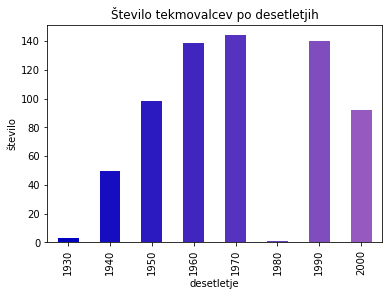

In [79]:
tekmovalci.groupby('desetletje').size().plot(kind = 'bar', color = my_colors)
plt.title('Število tekmovalcev po desetletjih'), plt.ylabel("število")

Zanimivo je, da samo en tekmovalec pripada skupini 1980 - 1989. Poglejmo si, kdo to je

In [80]:
tekmovalci[tekmovalci.desetletje == 1980]

,uvrstitev,ime,razred,letnica_rojstva,drzava,teza,pocep,potisk_s_prsi,mrtvi_dvig,skupaj,tocke,kategorija,spol,desetletje
ID_tekmovalca,,,,,,,,,,,,,,
1015958,3,Gómez Izquierdo Jesús David,J,1988,Colombia,52.75,160,95,185,440,425.38,moški 53 kg,moski,1980


###### **Hipoteza 1**: 
Ali obstaja povezava med starostjo in rezultatom posameznika.

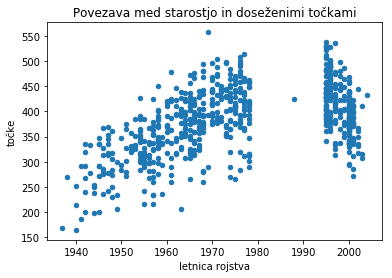

In [81]:
tekmovalci[tekmovalci.tocke > 100].plot.scatter('letnica_rojstva', 'tocke');
plt.title('Povezava med starostjo in doseženimi točkami'), plt.xlabel("letnica rojstva"), plt.ylabel("točke");

Iz grafa razberemo, da obstaja povezava med starostjo in rezultatom posameznika. Mlajši kot je tekmovalec, več točk doseže na tekmovanju. Ta povezava velja do leta 1980, potem pa od leta 1995 naprej velja, da mlajši kot je tekmovalec, manj točk doseže. Tekmovalci iz leta 1995 dosežejo povprečno več točk kot tisti iz leta 1980. Vmes ne vemo, kakšen je trend.

***Opomba***: zdi se nam, da pozitivna korelacija (med starostjo in rezultatom tekmovalca) velja do 1995, vendar ne moremo zagotovo trditi, saj imamo le enega tekmovalca rojenega v obdobju vmes. 

###### **Hipoteza 2**:
Zanima nas, katera starostna skupina je najbolj uspešna na tekmovanjih.

Kot prvi kriterij uspešnosti na tekmovanjih bomo vzeli povprečje vrednosti počepa, mrtvega dviga in potiska s prsi iz vseh kategorij. Najprej si bomo ogledali povprečje desetletja.

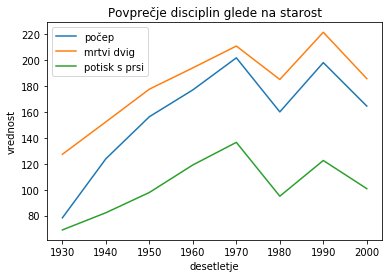

In [82]:
tekmovalci.groupby('desetletje').pocep.mean().plot()
tekmovalci.groupby('desetletje').mrtvi_dvig.mean().plot()
tekmovalci.groupby('desetletje').potisk_s_prsi.mean().plot()
plt.legend(['počep', 'mrtvi dvig', 'potisk s prsi']);
plt.title('Povprečje disciplin glede na starost');
plt.ylabel("vrednost");

Opazimo, da so tekmovalci iz generacije devetdesetih let bolj uspešni pri mrtvem dvigu, tekmovalci iz sedemsedetih let pa bolj uspešni v disciplini potisk s prsi. Pri disciplini počep ne moremo zagotovo reči, katera generacija je boljša.

***Opomba 1***: zdi se nam, da mlajši kot so tekmovalci (z izjemo mlajših od 20 let), bolj so uspešni v disciplinah.  To je seveda logično.

***Opomba 2***: razlog za padec pri osemdesetih letih je ta, da imamo le enega tekmovalca iz te generacije. Ta tekmovalec je tekmoval v lahki kategoriji, zato je povprečje relativno nizko glede na druge generacije.

***Opomba 3*** zgornji kriterij ni najboljši kriterij, saj se lahko zgodi, da so v neki generaciji tekmovalci samo iz težkih kategorij, v drugi generaciji pa samo iz lahkih kategorij.

Oglejmo si bolj natančno, tekmovalci katere generacije so bolj uspešni - naš kriterij bodo sedaj točke, saj so neodvisne od kategorij. V tabeli *najboljsi_moski* in *najboljse_zenske* vzamem 20 tekmovalcev in tekmovalk z največ točkami.

In [83]:
najboljsi_moski = tekmovalci[tekmovalci.spol == 'moski'].nlargest(20, 'tocke')
najboljse_zenske = tekmovalci[tekmovalci.spol == 'zenska'].nlargest(20, 'tocke')

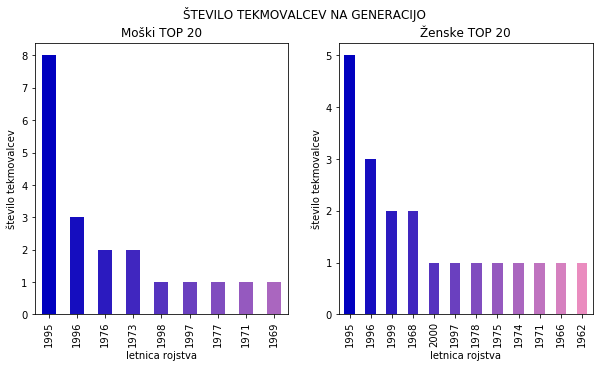

In [84]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
najboljsi_moski.groupby('letnica_rojstva').kategorija.count().sort_values(ascending = False).plot(kind = 'bar', 
                                                                                                  ax = ax1,
                                                                                                 figsize=(10,5),
                                                                                                 color = my_colors);
najboljse_zenske.groupby('letnica_rojstva').kategorija.count().sort_values(ascending = False).plot(kind = 'bar',
                                                                                                   ax = ax2,                                                                                                   
                                                                                                   figsize=(10,5),
                                                                                                  color = my_colors);
ax1.set_title('Moški TOP 20'), ax2.set_title('Ženske TOP 20');
ax1.set_xlabel("letnica rojstva"), ax2.set_xlabel("letnica rojstva")
ax1.set_ylabel("število tekmovalcev"), ax2.set_ylabel("število tekmovalcev")

plt.suptitle('ŠTEVILO TEKMOVALCEV NA GENERACIJO');

Osem moških tekmovalcev izmed 20 najboljših je bilo rojenih leta 1995 in trije v letu 1996. Pet tekmovalk pripada generaciji 1995 in tri tekmovalce letu 1996. Sedaj lahko trdimo, da sta najboljši generaciji na uradnih IPF tekmovanjih v letu 2018 generaciji 1995 in 1996.

Oglejmo si, kateri so bili tekmovalci, ki so dosegli največ točk na tekmovanjih.

In [85]:
najboljsi_moski[['ime', 'tocke']].tail(10)

,ime,tocke
ID_tekmovalca,,
1044530,McLaren Dale,508.97
1015983,Dickson Charles,507.56
1015966,Pho Clifton,506.56
1044556,Davenport Steven,503.74
1015972,Seay Micheal,502.78
1016007,Davis Michael,500.69
1044527,Rowe Benjamin,499.63
1044557,Magistrale Steve,498.82
1016030,Pena Joseph,498.49


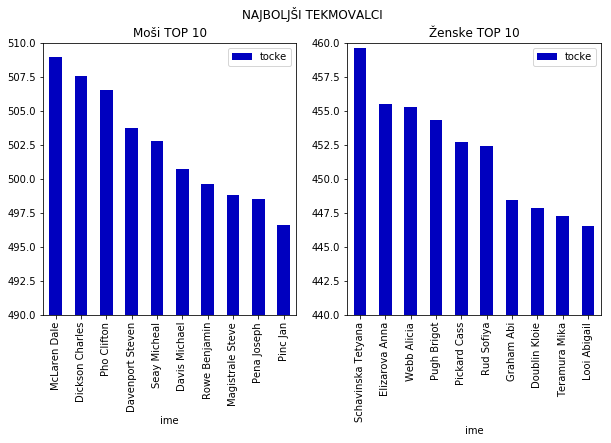

In [86]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
najboljsi_moski[['ime', 'tocke']].tail(10).plot(x = 'ime', 
                                                kind = 'bar',
                                                ylim=(490, 510),
                                                ax = ax1,
                                                figsize=(10,5),
                                                color = my_colors)
najboljse_zenske[['ime', 'tocke']].tail(10).plot(x = 'ime',
                                                 kind = 'bar',
                                                 ylim=(440, 460),
                                                 ax = ax2, 
                                                 figsize=(10,5),
                                                 color = my_colors)
ax1.set_title('Moši TOP 10'), ax2.set_title('Ženske TOP 10');
plt.suptitle('NAJBOLJŠI TEKMOVALCI');

Opazimo, da je pri ženskah razlika v točkah med prvim in drugim mestom nekoliko večja kot je ta razlika pri moških. Razlika med prvim in desetim tekmovalcev pri moških je 12 točk, pri ženskah pa je ta razlika 13 točk. Pri tekmovalkah je graf nekoliko bolj stopničast kot pri moških - med prvim in drugim ter med šestim in sedmim mestom je večja razlika točk, medtem ko so pri moških padci nekoliko bolj enakomerni. 

Oglejmo si, v katerih kategorijah je tekmovalo top 20 tekmovalcev in tekmovalk. 

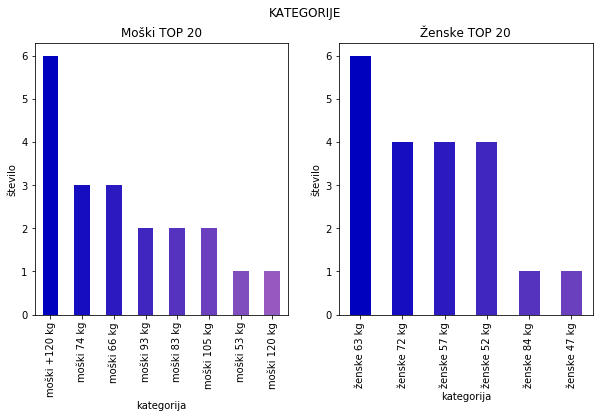

In [87]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
najboljsi_moski.groupby('kategorija').kategorija.count().sort_values(ascending = False).plot(kind= 'bar',
                                                                                            ax = ax1,
                                                                                            color = my_colors,
                                                                                            figsize=(10,5))

najboljse_zenske.groupby('kategorija').kategorija.count().sort_values(ascending = False).plot(kind= 'bar', 
                                                                                             ax = ax2, 
                                                                                             color = my_colors,
                                                                                             figsize=(10,5))
ax1.set_title('Moški TOP 20'), ax2.set_title('Ženske TOP 20');
ax1.set_ylabel("število"), ax2.set_ylabel("število")
plt.suptitle('KATEGORIJE');

Zgornji graf prikazuje, v katerih kategorijah so tekmovali moški in ženske, ki so so dosegli največ točk na tekmovanjih (top 20). Največ tekmovalcev je tekmovalo v najtežji kategoriji: +120 kg, pri ženskah pa jih je bilo največ v kategoriji 63 kg.

**Hipoteza 3**: Ali obstaja povezava med narodnostjo in uvrstitvijo tekmovalca?

Najprej si ogledamo, katere države sodelujejo na tekmovanju.

In [88]:
tekmovalci.groupby('drzava').size().sort_values(ascending = False)

drzava
USA                132
Canada              76
Great Britain       54
Japan               50
France              34
Finland             33
Mongolia            27
Russia              22
Germany             21
Norway              21
                  ... 
Slovak Republic      1
Bulgaria             1
Colombia             1
Iran                 1
Peru                 1
Ecuador              1
Egypt                1
Malaysia             1
Lebanon              1
Algeria              1
Length: 51, dtype: int64

Države hočemo razvrstiti tako, da bomo videli, kakšen delež tekmovalcev iz države je stalo na stopničkah. Naredimo novo tabelo *na_stopnickah*, ki vsebuje število tekmovalcev, ki so bili prvi, drugi ali tretji, po državah.
Tabela *st_tekmovalcev* vsebuje število tekmovalev po državi.

In [89]:
na_stopnickah = tekmovalci[(tekmovalci.uvrstitev == 1) |
                           (tekmovalci.uvrstitev == 2) | 
                           (tekmovalci.uvrstitev == 3)][['uvrstitev',
                                                         'drzava']].groupby('drzava').count()
st_tekmovalcev = tekmovalci[['uvrstitev',
                             'drzava']].groupby('drzava').count()

Združimo prejšnji tabeli v tabelo *drzave_stopnicke*, dodamo nov stolpec **delez_stopnick**, ki vsebuje delež, koliko tekmovalcev od vseh v državi je bilo prvih, drugih in tretjih skupaj. 

In [90]:
drzave_stopnicke = pd.merge(na_stopnickah,
                       st_tekmovalcev,
                       how = 'outer',
                       left_on='drzava', 
                       right_on='drzava')
drzave_stopnicke.columns = ['stopnicke', 'vsi']
drzave_stopnicke['delez_stopnick'] = drzave_stopnicke.stopnicke / drzave_stopnicke.vsi
drzave_stopnicke.fillna(0, inplace=True)
drzave_stopnicke

,stopnicke,vsi,delez_stopnick
drzava,,,
Australia,7.0,13,0.538462
Belarus,1.0,3,0.333333
Belgium,2.0,3,0.666667
Brazil,1.0,11,0.090909
Canada,33.0,76,0.434211
Czech Republic,5.0,14,0.357143
Denmark,2.0,4,0.500000
Finland,16.0,33,0.484848
France,16.0,34,0.470588


Posebej si ogledamo države, kjer so vsi tekmovalci stali na stopničkah.

In [92]:
drzave_stopnicke[drzave_stopnicke.delez_stopnick == 1].sort_values(by = 'stopnicke', ascending = False)

,stopnicke,vsi,delez_stopnick
drzava,,,
Lithuania,3.0,3,1.0
Hong Kong,2.0,2,1.0
Kyrgyzstan,2.0,2,1.0
Uruguay,2.0,2,1.0
Iran,1.0,1,1.0
Peru,1.0,1,1.0
Philippines,1.0,1,1.0
Slovak Republic,1.0,1,1.0
Slovenia,1.0,1,1.0


***Opomba***: od zgornjih držav bomo v nadaljnji analizi upoštevali le Litvo, saj držav, iz katerih je tekmovalo manj kot 3 tekmovalci, ne bomo upoštevali.

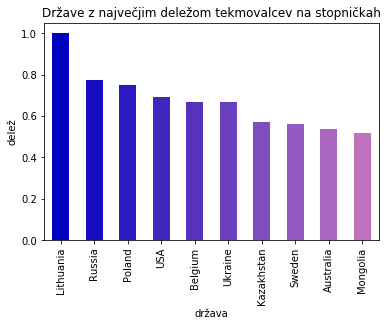

In [94]:
drzave_stopnicke[drzave_stopnicke.vsi >= 3].delez_stopnick.sort_values(ascending = False).head(10).plot(kind = 'bar',
                                                                                                       color = my_colors);
plt.title('Države z največjim deležom tekmovalcev na stopničkah'), plt.xlabel("država"), plt.ylabel("delež");

Rezultati nas ne presenečajo: Litva, Rusija, Poljska in Ukrajina spadajo pod države, kjer imajo tekmovalci nekoliko drugačen način treniranja: intenzivnost treningov je zelo visoka - submaksimalni in maksimalni treningi, tehniko izvajanja vadijo na velikih težah, število ponovitev v seriji je malo (od 3 do 5), število serij je veliko (od 5 naprej) , od 5 do 6 treningov na teden. Tak način treninga je ZELO težaven, vendar ljudje, ki tako trenirajo, dosegajo zelo dobre rezultate.

Za konec pa bi radi predstavili, kako dobri tekmovalci so tisti najboljši. Kot relativno mero bomo vzeli razmerje med telesno težo in dvignjeno težo. Oglejmo si tekmovalce, ki imajo najvišje razmerje v počepu, potisku s prsi in v mrtvem dvigu.

In [95]:
najboljsi_moski['ratio_pocep'] = najboljsi_moski.pocep / najboljsi_moski.teza
najboljsi_moski['ratio_potisk_prsa'] = najboljsi_moski.potisk_s_prsi / najboljsi_moski.teza
najboljsi_moski['ratio_mrtvi_dvig'] = najboljsi_moski.mrtvi_dvig / najboljsi_moski.teza
najboljsi_moski.ratio_pocep.max().round(1), najboljsi_moski.ratio_potisk_prsa.max().round(1), najboljsi_moski.ratio_mrtvi_dvig.max().round(1)

(3.9, 3.1, 5.1)

To je razmerje (počep, potisk s prsi, mrtvi dvig).
Razmerja so presenetljivo zelo visoka - oglejmo si, kdo ima razmerje mrtvega dviga 5.1:

In [78]:
tekmovalci.loc[1015956]

uvrstitev                     1
ime                LaCoe Dalton
razred                        J
letnica_rojstva            1995
drzava                      USA
teza                      52.92
pocep                       170
potisk_s_prsi               117
mrtvi_dvig                  271
skupaj                      559
tocke                    538.63
kategorija          moški 53 kg
spol                      moski
desetletje                 1990
Name: 1015956, dtype: object

To je tudi trenutni rekord v razredu Junior (J). Povezava do posnetka tega dviga: https://www.youtube.com/watch?v=BcsJGE1uumA.